In [3]:
from pandas import read_parquet, DataFrame
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from json import load

from benchmarks.format_conversions import ConversionMetadata

In [4]:
def load_conversion_data(path: Path) -> tuple[dict[str, DataFrame], ConversionMetadata]:
   conversion_timings = {file.stem: read_parquet(file) for file in scipy_data_dir.glob("*.parquet")}
   metadata_file = path / "metadata.json"
   with metadata_file.open("r") as file:
      metadata = ConversionMetadata(**load(file))
   return conversion_timings, metadata

def find_fastest(dct: dict[str, DataFrame], runs: int = None, time_norm: int = None) -> DataFrame:
   fastest = DataFrame({src_fmt: values.min() for src_fmt, values in dct.items()})
   if runs:
      fastest = fastest / runs
   if time_norm:
      fastest = fastest * time_norm
   return fastest.transpose()

In [38]:
scipy_data_dir = Path(r"C:\Users\Maxximiser\Software projects\Python projects\bi12_graduation\Simulation platform\src\benchmarks\scipy_reinc")
scipy_timings = load_conversion_data(scipy_data_dir)

In [39]:
# Find the fastest conversion time per format.
scipy_fastest = {src_fmt: values.min() for src_fmt, values in scipy_timings[0].items()}
# Divide timing data with number of runs.
df = DataFrame(scipy_fastest) / scipy_timings[1].number_of_runs
# Convert timings to milliseconds from seconds.
df = df * 1_000
# Transpose dataframe to read left-to-right: format from to format to.
df = df.transpose()

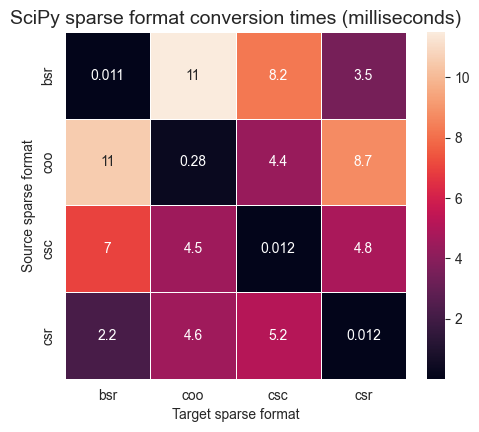

In [40]:
# f, ax = plt.subplots(figsize=(11, 9))
# f, ax = plt.subplots(figsize=(6.6, 5.4))
f, ax = plt.subplots(figsize=(5.5, 4.5))
sns.heatmap(df, annot=True, linewidths=.5, ax=ax)
ax.set_title("SciPy sparse format conversion times (milliseconds)", fontdict={"fontsize": 14})
ax.set_xlabel("Target sparse format")
ax.set_ylabel("Source sparse format")
# plt.tight_layout()
plt.show()
# plt.savefig("out02.svg")

In [5]:
def plot_heatmap(data, title):
   f, ax = plt.subplots(figsize=(5.5, 4.5))
   sns.heatmap(data, annot=True, linewidths=.5, ax=ax)
   ax.set_title(title, fontdict={"fontsize": 14})
   ax.set_xlabel("Target sparse format")
   ax.set_ylabel("Source sparse format")
   return f, ax

In [6]:
cupy_path = Path(r"C:\Users\Maxximiser\OneDrive - HAN\cupyx_timings")
cpu_timings = {file.stem: read_parquet(file) for file in cupy_path.glob("*cpu.parquet")}
gpu_timings = {file.stem: read_parquet(file) for file in cupy_path.glob("*gpu.parquet")}
combined_timings = {}
for fmt in cpu_timings.keys():
   fmt_normalised = fmt.split("_")[0]
   combined_timings[fmt_normalised] = cpu_timings[f"{fmt_normalised}_cpu"] + gpu_timings[f"{fmt_normalised}_gpu"]

cpu_fastest = find_fastest(cpu_timings, time_norm=1_000)
gpu_fastest = find_fastest(gpu_timings, time_norm=1_000)
combined_fastest = find_fastest(combined_timings, time_norm=1_000)

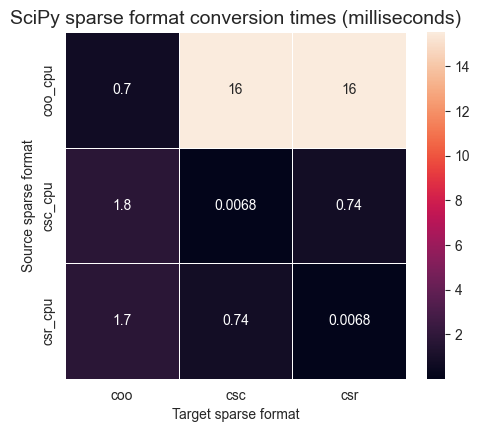

In [7]:
f, ax = plot_heatmap(cpu_fastest, "SciPy sparse format conversion times (milliseconds)")
plt.show()

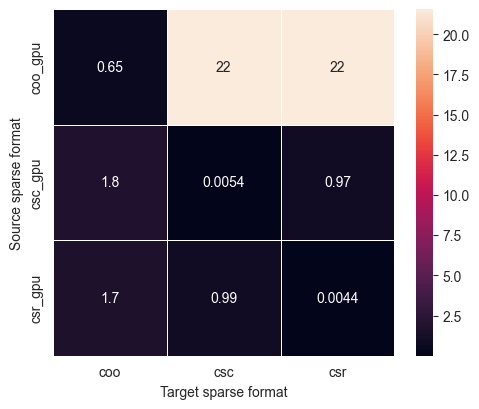

In [8]:
f, ax = plot_heatmap(gpu_fastest, "")
plt.show()